## Final Project Submission

Please fill out:
* Student name: Jacob M hansen
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


### Business Case



ARCH is a partnership of King County and East King County cities working to preserve and increase the supply of housing for low and moderate income households in the region.  ARCH wants to expand their knowledge of the housing conditions that contribute to the sale price of a home, particularly homes priced below the median price range in King County to better serve their clients in that area.

ARCH has two primary goals:

1. Develop a predictive algorithm that predicts the sale price of a home given certain features such as square footage, condition of the home, zip code, size of lot, number of bedrooms and bathrooms.


2. ARCH also wants to better understand how these features interact and influence the home sale price so that they can better advise their clients when searching for homes at or below the median price.




### Load and Examine Dataset

In [1]:
#import packages pandas, matplotlib, seaborn, numpy

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# load King County Housing dataset

house = pd.read_csv('kc_house_data.csv')

# Examine first rows of data set

house.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [2]:
print(house.info())
print(house.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
# Examine summary statistics
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# Examine the value counts for categorical data: condition, view, waterfront and grade
house['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [5]:
house['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [6]:
house['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [7]:
house['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [8]:
house['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [9]:
#check for missing data

house.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

House Sale Price Mean: 540296.5735055795
House Sale Price Median 450000.0


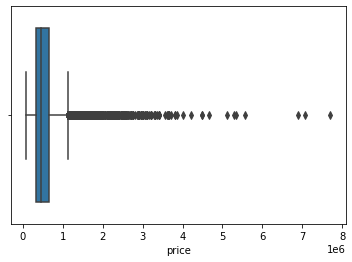

In [10]:
# Examine outliers that may skew our data

# Use boxplot to examine outliers
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.boxplot(house['price'])

print("House Sale Price Mean:", house['price'].mean())
print("House Sale Price Median", house['price'].median())

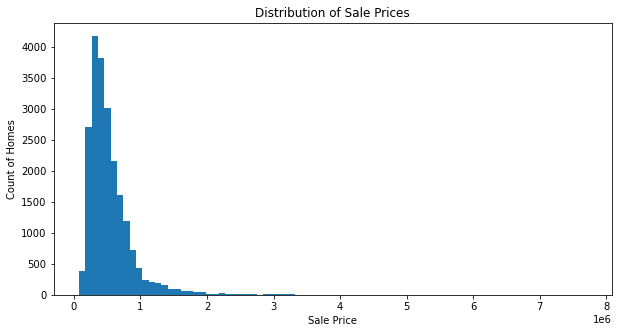

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(house['price'], bins=80)

ax.set_xlabel("Sale Price")
ax.set_ylabel("Count of Homes")
ax.set_title("Distribution of Sale Prices");


In [12]:
# Capture the data that reflects two standard deviations, z-score = 2, to capture 95% of data 
# and to eliminate extreme outliers that skew the mean. 

print(house['price'].describe())

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


In [13]:
# Identify z-score range of 2 to capture 95% of data and reduce extreme outliers
upper = house.price.mean() + 2*house.price.std()

lower = house.price.mean() - 2*house.price.std()

print(upper)

print(lower)

1275032.8537083685
-194439.7066972095


In [14]:
new_house= house[(house.price<upper) & (house.price>lower)]

#new_house = house[house.price < 1000000]

print(house.shape)

print(new_house.shape)

(21597, 21)
(20756, 21)


## 1. Predictive Modeling

#### Drop irrelevant columns

In [15]:
# Assign target and predictors

# Target
y = new_house["price"]
# Predictors
X = new_house.drop('price', axis = 1)

In [16]:
# import scikit learn and split the data into training and test data

from sklearn.linear_model import LinearRegression

model = LinearRegression()
#model.fit(X_train, y_train)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)

In [17]:

print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# Assert that we have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 15567 rows and 20 columns
y_train is a Series with 15567 values


In [18]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [19]:
# Assign relevant columns

relevant_columns = [
    'date',  # date house was sold
    'bedrooms',  # the number of bedrooms
    'bathrooms', # number of bathrooms  
    'sqft_living', # square footage of home living space  
    'sqft_lot',  # square footage of the lot
    'condition', # how good the overall condition of the house is, related to maintenance 
    'grade',  # the overall design and construction of the house 
    'yr_built', # year the home was constructed
    'zipcode',  # zipcode location of the home
    'yr_renovated', # year house was renovated
    'lat', # latitude of home
    'long', # longitude of home
    'view', # details type of view the home has
    'floors' # number of floors in the home

]

# Reassign X_train so that it only contains relevant columns
X_train = X_train.loc[ : , relevant_columns]

# Visually inspect X_train
X_train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_built,zipcode,yr_renovated,lat,long,view,floors
13029,9/8/2014,3,1.75,2580,40392,Average,9 Better,1986,98072,NaN,47.7637,-122.134,NONE,1.0
10675,11/13/2014,3,1.75,2060,3600,Average,7 Average,1905,98119,1985.0,47.6389,-122.371,NONE,1.5
20973,8/5/2014,5,3.25,3030,7410,Average,8 Good,2014,98106,0.0,47.5530,-122.354,NONE,2.0
18777,8/27/2014,3,2.25,2550,8588,Average,9 Better,1989,98011,0.0,47.7711,-122.195,EXCELLENT,1.0
863,3/3/2015,3,3.50,2480,3200,Average,10 Very Good,2010,98144,0.0,47.5951,-122.307,NONE,2.0


In [20]:
# Assign Relevant columns to X_test
X_test = X_test.loc[ : , relevant_columns]

X_test.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_built,zipcode,yr_renovated,lat,long,view,floors
10693,4/30/2015,3,2.50,1640,5707,Average,7 Average,1995,98031,NaN,47.4016,-122.209,NONE,2.0
4233,6/12/2014,3,1.00,1050,5664,Good,7 Average,1947,98115,0.0,47.6897,-122.285,NONE,1.0
9396,10/7/2014,3,1.75,1560,5760,Very Good,6 Low Average,1927,98106,0.0,47.5272,-122.359,NONE,1.0
11700,8/21/2014,2,1.75,1960,6000,Good,7 Average,1904,98199,0.0,47.6531,-122.401,NONE,1.0
8568,5/27/2014,2,1.00,1040,5527,Average,7 Average,1951,98115,0.0,47.6774,-122.284,NONE,1.0


Home Sale Price Median: 440000.0


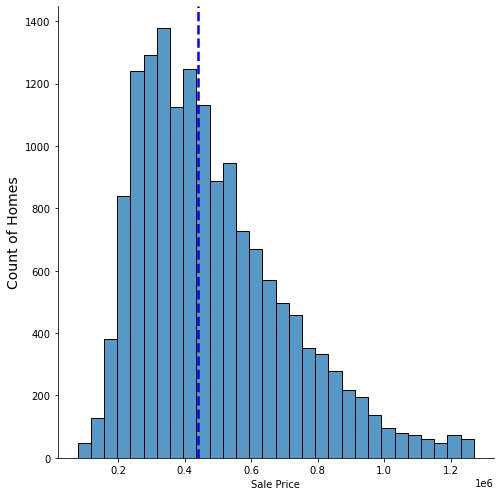

In [21]:
# Examine sale price distribution

sns.displot(house,
            x = y_train,
            bins=30,
           height=7)
plt.xlabel("Sale Price", size=10)
plt.ylabel("Count of Homes", size=14)
plt.axvline(x=y_train.median(),
            color='blue',
            ls='--', 
            lw=2.5);
#plt.savefig("SalePrice_histogram_with_median_line)

print("Home Sale Price Median:", y_train.median())

#### Handle Missing Values

In [22]:
# Identify missing values

X_train.isna().sum()

date               0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
condition          0
grade              0
yr_built           0
zipcode            0
yr_renovated    2748
lat                0
long               0
view              47
floors             0
dtype: int64

#### Convert categorical features to numerical data

In [23]:
# Identify categorical and numeric data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15567 entries, 13029 to 16406
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          15567 non-null  object 
 1   bedrooms      15567 non-null  int64  
 2   bathrooms     15567 non-null  float64
 3   sqft_living   15567 non-null  int64  
 4   sqft_lot      15567 non-null  int64  
 5   condition     15567 non-null  object 
 6   grade         15567 non-null  object 
 7   yr_built      15567 non-null  int64  
 8   zipcode       15567 non-null  int64  
 9   yr_renovated  12819 non-null  float64
 10  lat           15567 non-null  float64
 11  long          15567 non-null  float64
 12  view          15520 non-null  object 
 13  floors        15567 non-null  float64
dtypes: float64(5), int64(5), object(4)
memory usage: 1.8+ MB


In [24]:
# Examine value counts for categories - 'object' datatypes

print(X_train['date'].value_counts())
print()
print(X_train['condition'].value_counts())
print()
print(X_train['grade'].value_counts())
print()
print(X_train['view'].value_counts())

6/26/2014     101
6/23/2014      97
3/25/2015      95
4/14/2015      90
4/29/2015      90
             ... 
8/3/2014        1
9/13/2014       1
12/14/2014      1
11/15/2014      1
10/11/2014      1
Name: date, Length: 365, dtype: int64

Average      10122
Good          4100
Very Good     1195
Fair           128
Poor            22
Name: condition, dtype: int64

7 Average        6789
8 Good           4441
9 Better         1821
6 Low Average    1558
10 Very Good      621
5 Fair            173
11 Excellent      143
4 Low              14
12 Luxury           6
3 Poor              1
Name: grade, dtype: int64

NONE         14265
AVERAGE        630
GOOD           286
FAIR           202
EXCELLENT      137
Name: view, dtype: int64


In [25]:
# convert date to numeric and extract month only 
import datetime

#X_train['date'] = pd.to_datetime(X_train["date"]).dt.strftime("%Y%m%d").astype(int)

X_train['sale_month'] = pd.DatetimeIndex(X_train['date']).month.astype(int)

X_train['sale_month'].value_counts()

5     1754
4     1604
7     1579
6     1571
10    1371
8     1352
3     1350
9     1287
12    1060
11    1024
2      906
1      709
Name: sale_month, dtype: int64

In [26]:
X_train.drop('date', axis = 1, inplace = True)

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15567 entries, 13029 to 16406
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      15567 non-null  int64  
 1   bathrooms     15567 non-null  float64
 2   sqft_living   15567 non-null  int64  
 3   sqft_lot      15567 non-null  int64  
 4   condition     15567 non-null  object 
 5   grade         15567 non-null  object 
 6   yr_built      15567 non-null  int64  
 7   zipcode       15567 non-null  int64  
 8   yr_renovated  12819 non-null  float64
 9   lat           15567 non-null  float64
 10  long          15567 non-null  float64
 11  view          15520 non-null  object 
 12  floors        15567 non-null  float64
 13  sale_month    15567 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.8+ MB


In [28]:
# convert date in X_test to sale_month
X_test['sale_month'] = pd.DatetimeIndex(X_test['date']).month.astype(int)

X_test.drop('date', axis = 1, inplace = True)

In [29]:
X_test['sale_month'].value_counts()

5     559
7     545
4     537
6     521
8     515
3     442
9     435
10    428
12    356
11    332
2     295
1     224
Name: sale_month, dtype: int64

### Baseline model
Identify the most correlated feature and build a baseline model for price.

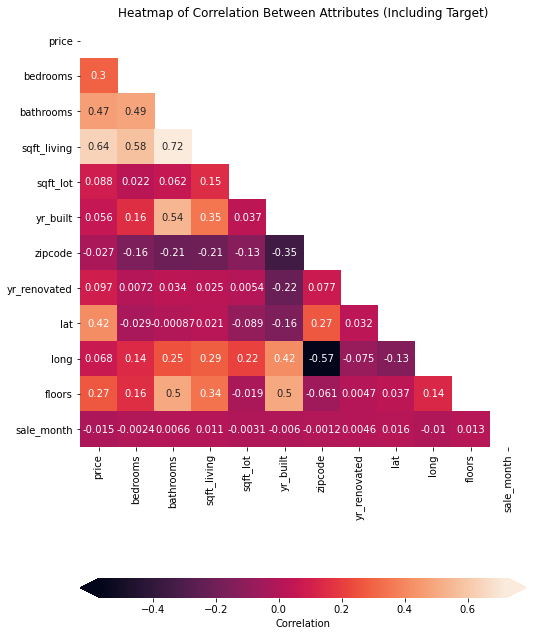

In [30]:
# Create a heatmap to examine the correlational coefficents

# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(8, 12))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

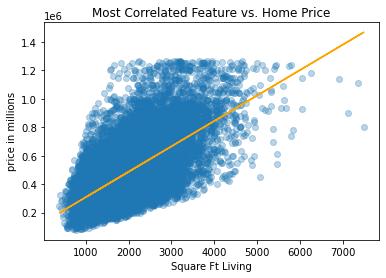

In [31]:
most_correlated_feature = 'sqft_living'

fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.3)
m, b = np.polyfit(X_train[most_correlated_feature], y_train, 1)
plt.plot(X_train[most_correlated_feature], m*X_train[most_correlated_feature]+b, color = 'orange')
ax.set_xlabel("Square Ft Living")
ax.set_ylabel("price in millions")
ax.set_title("Most Correlated Feature vs. Home Price");

In [32]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.40324782709139456
Validation score: 0.409301098969402


### Baseline model summary - 
The baseline model takes the most correlated feature, square foot living space, to examine how it affects home price. The score is an R squared value. Currently, using only one feature, the baseline model accounts for approximately 40% of the variance in a home price. Square foot living is a significant feature, but on its own it is not enough to explain the price of a home.

### First Predictive Model

Create a model that includes all selected relevant features.

Include all features now from X_train. Convert categories to numeric using scikitlearn preprocessing. Account for multicollinearity using OneHotEncoder

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15567 entries, 13029 to 16406
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      15567 non-null  int64  
 1   bathrooms     15567 non-null  float64
 2   sqft_living   15567 non-null  int64  
 3   sqft_lot      15567 non-null  int64  
 4   condition     15567 non-null  object 
 5   grade         15567 non-null  object 
 6   yr_built      15567 non-null  int64  
 7   zipcode       15567 non-null  int64  
 8   yr_renovated  12819 non-null  float64
 9   lat           15567 non-null  float64
 10  long          15567 non-null  float64
 11  view          15520 non-null  object 
 12  floors        15567 non-null  float64
 13  sale_month    15567 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.8+ MB


#### Handle Missing Data

1. X_train missing data for yr_renovated and view

2. X_test missing data for yr_renovated and view

In [34]:
X_train.isna().sum()


bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
condition          0
grade              0
yr_built           0
zipcode            0
yr_renovated    2748
lat                0
long               0
view              47
floors             0
sale_month         0
dtype: int64

In [35]:
# Convert yr_renovated to binary, if there is a value == 1
#Create a new column name 'renovated' that captures whether the house was renovated or not

X_train['renovated'] = X_train['yr_renovated'].where(X_train['yr_renovated'] == 0)
X_train['renovated'].fillna('1', inplace = True)
X_train['renovated']= X_train['renovated'].astype(int)

#Drop yr_renovated column
X_train.drop(['yr_renovated'], axis = 1, inplace = True)

#Inspect yr_renovated column is dropped and for new column renovated
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_built,zipcode,lat,long,view,floors,sale_month,renovated
13029,3,1.75,2580,40392,Average,9 Better,1986,98072,47.7637,-122.134,NONE,1.0,9,1
10675,3,1.75,2060,3600,Average,7 Average,1905,98119,47.6389,-122.371,NONE,1.5,11,1
20973,5,3.25,3030,7410,Average,8 Good,2014,98106,47.5530,-122.354,NONE,2.0,8,0
18777,3,2.25,2550,8588,Average,9 Better,1989,98011,47.7711,-122.195,EXCELLENT,1.0,8,0
863,3,3.50,2480,3200,Average,10 Very Good,2010,98144,47.5951,-122.307,NONE,2.0,3,0


In [36]:
# Handle missing values in view column

X_train['view'] = X_train['view'].fillna('missing')

# Inspect X_train for missing values

X_train.isna().sum()

bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
condition      0
grade          0
yr_built       0
zipcode        0
lat            0
long           0
view           0
floors         0
sale_month     0
renovated      0
dtype: int64

In [37]:
# Convert yr_renovated in X_test to binary, if there is a value == 1
#Create a new column name 'renovated' that captures whether the house was renovated or not

X_test['renovated'] = X_test['yr_renovated'].where(X_test['yr_renovated'] == 0)
X_test['renovated'].fillna('1', inplace = True)
X_test['renovated']= X_test['renovated'].astype(int)

#Drop yr_renovated column
X_test.drop(['yr_renovated'], axis = 1, inplace = True)

#Inspect yr_renovated column is dropped and for new column renovated
X_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_built,zipcode,lat,long,view,floors,sale_month,renovated
10693,3,2.50,1640,5707,Average,7 Average,1995,98031,47.4016,-122.209,NONE,2.0,4,1
4233,3,1.00,1050,5664,Good,7 Average,1947,98115,47.6897,-122.285,NONE,1.0,6,0
9396,3,1.75,1560,5760,Very Good,6 Low Average,1927,98106,47.5272,-122.359,NONE,1.0,10,0
11700,2,1.75,1960,6000,Good,7 Average,1904,98199,47.6531,-122.401,NONE,1.0,8,0
8568,2,1.00,1040,5527,Average,7 Average,1951,98115,47.6774,-122.284,NONE,1.0,5,0


In [38]:
# Handle missing values in X_test view column

X_test['view'] = X_test['view'].fillna('missing')

# Inspect X_train for missing values

X_test.isna().sum()

bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
condition      0
grade          0
yr_built       0
zipcode        0
lat            0
long           0
view           0
floors         0
sale_month     0
renovated      0
dtype: int64

### Account for Multicollinearity in the categorical features 

Categorical Features - condition, grade, view, and renovated.

Renovated is binary but should be categorical in this instance

Begin with X_train and then X_test following each X_train category to ensure categories line up.

#### One Hot Encode for condition

In [39]:
# (0) import OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder

# (1) Create a variable condition_train
# extracted from X_train
# (double brackets due to shape expected by OHE)
condition_train = X_train[["condition"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories = "auto", sparse = False, handle_unknown = "ignore")

# (3) Fit the encoder on condition_train
ohe.fit(condition_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['Average', 'Fair', 'Good', 'Poor', 'Very Good'], dtype=object)]

In [40]:
# (4) Transform condition_train using the encoder and
# assign the result to condition_encoded_train
condition_encoded_train = ohe.transform(condition_train)

# Visually inspect condition_encoded_train
condition_encoded_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [41]:
# (5a) Make the transformed data into a dataframe
condition_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    condition_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Visually inspect new dataframe
condition_encoded_train.head()

,Average,Fair,Good,Poor,Very Good
13029,1.0,0.0,0.0,0.0,0.0
10675,1.0,0.0,0.0,0.0,0.0
20973,1.0,0.0,0.0,0.0,0.0
18777,1.0,0.0,0.0,0.0,0.0
863,1.0,0.0,0.0,0.0,0.0


In [42]:
# (5b) Drop original condition column
X_train.drop("condition", axis=1, inplace=True)

# Visually inspect X_train
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,grade,yr_built,zipcode,lat,long,view,floors,sale_month,renovated
13029,3,1.75,2580,40392,9 Better,1986,98072,47.7637,-122.134,NONE,1.0,9,1
10675,3,1.75,2060,3600,7 Average,1905,98119,47.6389,-122.371,NONE,1.5,11,1
20973,5,3.25,3030,7410,8 Good,2014,98106,47.5530,-122.354,NONE,2.0,8,0
18777,3,2.25,2550,8588,9 Better,1989,98011,47.7711,-122.195,EXCELLENT,1.0,8,0
863,3,3.50,2480,3200,10 Very Good,2010,98144,47.5951,-122.307,NONE,2.0,3,0


In [43]:
# (5c) Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, condition_encoded_train], axis=1)

# Visually inspect X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15567 entries, 13029 to 16406
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     15567 non-null  int64  
 1   bathrooms    15567 non-null  float64
 2   sqft_living  15567 non-null  int64  
 3   sqft_lot     15567 non-null  int64  
 4   grade        15567 non-null  object 
 5   yr_built     15567 non-null  int64  
 6   zipcode      15567 non-null  int64  
 7   lat          15567 non-null  float64
 8   long         15567 non-null  float64
 9   view         15567 non-null  object 
 10  floors       15567 non-null  float64
 11  sale_month   15567 non-null  int64  
 12  renovated    15567 non-null  int64  
 13  Average      15567 non-null  float64
 14  Fair         15567 non-null  float64
 15  Good         15567 non-null  float64
 16  Poor         15567 non-null  float64
 17  Very Good    15567 non-null  float64
dtypes: float64(9), int64(7), object(2)
memory 

In [44]:
#One-hot encode X_test condition

condition_test = X_test[["condition"]]
condition_encoded_test = ohe.transform(condition_test)
condition_encoded_test = pd.DataFrame(
    condition_encoded_test,
    columns=ohe.categories_[0],
    index=X_test.index
)
X_test.drop("condition", axis=1, inplace=True)
X_test = pd.concat([X_test, condition_encoded_test], axis=1)


#### One Hot Encode for Grade

In [45]:
# One hot encode grade

grade_train = X_train[["grade"]]

ohe.fit(grade_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['10 Very Good', '11 Excellent', '12 Luxury', '3 Poor', '4 Low',
        '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better'],
       dtype=object)]

In [46]:
# Transform condition_train using the encoder 
grade_encoded_train = ohe.transform(grade_train)

# Visually inspect condition_encoded_train
grade_encoded_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [47]:
# Make the transformed data into a dataframe
grade_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    grade_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Visually inspect new dataframe
grade_encoded_train.head()

,10 Very Good,11 Excellent,12 Luxury,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
13029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
863,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# (5b) Drop original condition column
X_train.drop("grade", axis=1, inplace=True)

# Visually inspect X_train
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,zipcode,lat,long,view,floors,sale_month,renovated,Average,Fair,Good,Poor,Very Good
13029,3,1.75,2580,40392,1986,98072,47.7637,-122.134,NONE,1.0,9,1,1.0,0.0,0.0,0.0,0.0
10675,3,1.75,2060,3600,1905,98119,47.6389,-122.371,NONE,1.5,11,1,1.0,0.0,0.0,0.0,0.0
20973,5,3.25,3030,7410,2014,98106,47.5530,-122.354,NONE,2.0,8,0,1.0,0.0,0.0,0.0,0.0
18777,3,2.25,2550,8588,1989,98011,47.7711,-122.195,EXCELLENT,1.0,8,0,1.0,0.0,0.0,0.0,0.0
863,3,3.50,2480,3200,2010,98144,47.5951,-122.307,NONE,2.0,3,0,1.0,0.0,0.0,0.0,0.0


In [49]:
# (5c) Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, grade_encoded_train], axis=1)

# Visually inspect X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15567 entries, 13029 to 16406
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       15567 non-null  int64  
 1   bathrooms      15567 non-null  float64
 2   sqft_living    15567 non-null  int64  
 3   sqft_lot       15567 non-null  int64  
 4   yr_built       15567 non-null  int64  
 5   zipcode        15567 non-null  int64  
 6   lat            15567 non-null  float64
 7   long           15567 non-null  float64
 8   view           15567 non-null  object 
 9   floors         15567 non-null  float64
 10  sale_month     15567 non-null  int64  
 11  renovated      15567 non-null  int64  
 12  Average        15567 non-null  float64
 13  Fair           15567 non-null  float64
 14  Good           15567 non-null  float64
 15  Poor           15567 non-null  float64
 16  Very Good      15567 non-null  float64
 17  10 Very Good   15567 non-null  float64
 18  11

In [50]:
#One-hot encode X_test grade

grade_test = X_test[["grade"]]
grade_encoded_test = ohe.transform(grade_test)
grade_encoded_test = pd.DataFrame(
    grade_encoded_test,
    columns=ohe.categories_[0],
    index=X_test.index
)
X_test.drop("grade", axis=1, inplace=True)
X_test = pd.concat([X_test, grade_encoded_test], axis=1)


#### One Hot Encode for View

In [51]:
# One hot encode view

view_train = X_train[["view"]]

ohe.fit(view_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE', 'missing'],
       dtype=object)]

In [52]:
# Transform condition_train using the encoder 
view_encoded_train = ohe.transform(view_train)

# Make the transformed data into a dataframe
view_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    view_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Visually inspect new dataframe
view_encoded_train.head()

,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,missing
13029,0.0,0.0,0.0,0.0,1.0,0.0
10675,0.0,0.0,0.0,0.0,1.0,0.0
20973,0.0,0.0,0.0,0.0,1.0,0.0
18777,0.0,1.0,0.0,0.0,0.0,0.0
863,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
# (5b) Drop original condition column
X_train.drop("view", axis=1, inplace=True)

# Visually inspect X_train
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,zipcode,lat,long,floors,sale_month,...,10 Very Good,11 Excellent,12 Luxury,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
13029,3,1.75,2580,40392,1986,98072,47.7637,-122.134,1.0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10675,3,1.75,2060,3600,1905,98119,47.6389,-122.371,1.5,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20973,5,3.25,3030,7410,2014,98106,47.5530,-122.354,2.0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18777,3,2.25,2550,8588,1989,98011,47.7711,-122.195,1.0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
863,3,3.50,2480,3200,2010,98144,47.5951,-122.307,2.0,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# (5c) Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, view_encoded_train], axis=1)

# Visually inspect X_train
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15567 entries, 13029 to 16406
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       15567 non-null  int64  
 1   bathrooms      15567 non-null  float64
 2   sqft_living    15567 non-null  int64  
 3   sqft_lot       15567 non-null  int64  
 4   yr_built       15567 non-null  int64  
 5   zipcode        15567 non-null  int64  
 6   lat            15567 non-null  float64
 7   long           15567 non-null  float64
 8   floors         15567 non-null  float64
 9   sale_month     15567 non-null  int64  
 10  renovated      15567 non-null  int64  
 11  Average        15567 non-null  float64
 12  Fair           15567 non-null  float64
 13  Good           15567 non-null  float64
 14  Poor           15567 non-null  float64
 15  Very Good      15567 non-null  float64
 16  10 Very Good   15567 non-null  float64
 17  11 Excellent   15567 non-null  float64
 18  12

In [55]:
#One-hot encode X_test view

view_test = X_test[["view"]]
view_encoded_test = ohe.transform(view_test)
view_encoded_test = pd.DataFrame(
    view_encoded_test,
    columns=ohe.categories_[0],
    index=X_test.index
)
X_test.drop("view", axis=1, inplace=True)
X_test = pd.concat([X_test, view_encoded_test], axis=1)


#### One hot encode for renovated

In [56]:
# One hot encode renovated

renovated_train = X_train[["renovated"]]

ohe.fit(renovated_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array([0, 1])]

In [57]:
# Transform renovated_train using the encoder 
renovated_encoded_train = ohe.transform(renovated_train)

# Make the transformed data into a dataframe
renovated_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    renovated_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)


In [58]:
# Drop original renovated column
X_train.drop("renovated", axis=1, inplace=True)

# Visually inspect X_train
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,zipcode,lat,long,floors,sale_month,...,6 Low Average,7 Average,8 Good,9 Better,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,missing
13029,3,1.75,2580,40392,1986,98072,47.7637,-122.134,1.0,9,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10675,3,1.75,2060,3600,1905,98119,47.6389,-122.371,1.5,11,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20973,5,3.25,3030,7410,2014,98106,47.5530,-122.354,2.0,8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18777,3,2.25,2550,8588,1989,98011,47.7711,-122.195,1.0,8,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
863,3,3.50,2480,3200,2010,98144,47.5951,-122.307,2.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
# Concatenate X_train and renovated encoded
X_train = pd.concat([X_train, renovated_encoded_train], axis=1)

In [60]:
#One-hot encode X_test renovated

renovated_test = X_test[["renovated"]]
renovated_encoded_test = ohe.transform(renovated_test)
renovated_encoded_test = pd.DataFrame(
    renovated_encoded_test,
    columns=ohe.categories_[0],
    index=X_test.index
)
X_test.drop("renovated", axis=1, inplace=True)
X_test = pd.concat([X_test, renovated_encoded_test], axis=1)


### Evaluate First Predictive Model

In [61]:
# Perform cross validation to check how the model is performing
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()

from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)

model_1_scores = cross_validate(
    estimator=model_1,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", model_1_scores["train_score"].mean())
print("Validation score:", model_1_scores["test_score"].mean())

Train score:      0.7028422850446635
Validation score: 0.7035709013153183


In [62]:
cross_val_score(model_1, X_train, y_train, cv=3)

array([0.69572344, 0.70310739, 0.70448627])

In [63]:
import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     1271.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:02:43   Log-Likelihood:            -2.0436e+05
No. Observations:               15567   AIC:                         4.088e+05
Df Residuals:                   15537   BIC:                         4.090e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.805e+06   1.04e+06      1.735      0.083   -2.34e+05    3.84e+06
bedrooms      -8821.8753   1374.913     -6.416      0.000   -1.15e+04   -6126.886
bathrooms      2.808e+04   2362.297     11.885      0.000    2.34e+04    3.27e+04
sqft_living      89.2632      2.410     37.044      0.000      84.540      93.986
sqft_lot          0.1366      0.025      5.552      0.000       0.088       0.185
yr_built      -1983.4714     51.462    -38.542      0.000   -2084.343   -1882.599
zipcode        -321.4291     23.711    -13.556      0.000    -367.905    -274.953
lat            5.579e+05   7508.598     74.299      0.000    5.43e+05    5.73e+05
long          -4.669e+04   9156.393     -5.099      0.000   -6.46e+04   -2.87e+04
floors          2.98e+04   2343.542     12.717      0.000    2.52e+04    3.44e+04
sale_month    -2283.4757    312.921     -7.297      0.000   -2896.837   -1670.114
Average        3.703e+05   2.08e+05      1.777      0.076   -3.81e+04    7.79e+05
Fair           3.449e+05   2.08e+05      1.654      0.098   -6.37e+04    7.53e+05
Good           3.898e+05   2.08e+05      1.875      0.061   -1.77e+04    7.97e+05
Poor           2.786e+05   2.09e+05      1.332      0.183   -1.31e+05    6.88e+05
Very Good      4.215e+05   2.08e+05      2.026      0.043    1.37e+04    8.29e+05
10 Very Good   3.708e+05   1.05e+05      3.523      0.000    1.64e+05    5.77e+05
11 Excellent   4.321e+05   1.06e+05      4.093      0.000    2.25e+05    6.39e+05
12 Luxury       3.72e+05   1.14e+05      3.258      0.001    1.48e+05    5.96e+05
3 Poor         1.137e+05   1.51e+05      0.755      0.450   -1.81e+05    4.09e+05
4 Low           978.3634   1.09e+05      0.009      0.993   -2.12e+05    2.14e+05
5 Fair        -1.492e+04   1.05e+05     -0.142      0.887   -2.21e+05    1.91e+05
6 Low Average  8326.4109   1.05e+05      0.079      0.937   -1.98e+05    2.15e+05
7 Average      7.888e+04   1.05e+05      0.750      0.453   -1.27e+05    2.85e+05
8 Good         1.635e+05   1.05e+05      1.554      0.120   -4.27e+04     3.7e+05
9 Better       2.797e+05   1.05e+05      2.659      0.008    7.35e+04    4.86e+05
AVERAGE        2.892e+05   1.73e+05      1.667      0.095   -5.08e+04    6.29e+05
EXCELLENT       4.25e+05   1.74e+05      2.444      0.015    8.41e+04    7.66e+05
FAIR           2.967e+05   1.74e+05      1.707      0.088   -4.39e+04    6.37e+05
GOOD           3.321e+05   1.74e+05      1.913      0.056   -8252.373    6.72e+05
NONE           2.188e+05   1.73e+05      1.264      0.206    -1.2e+05    5.58e+05
missing        2.431e+05   1.74e+05      1.399      0.162   -9.76e+04    5.84e+05
0              9.006e+05    5.2e+05      1.731      0.083   -1.19e+05    1.92e+06
1              9.044e+05    5.2e+05      1.739      0.082   -1.15e+05    1.92e+06
=================================================

### First predictive model iteration summary - 

After converting all columns to numeric data and accounting for multicollinearity using OneHotEncoder, the current model accounts for close to 70% of the variance between home sale price and the independent varaiables.  This is an improvement on the baseline model that only used the most correlated feature of square foot living space giving us a variance value of ~40%. While this increase is helpful the variance could possibly be improved. It may be helpful to one hot encode the numeric features of bedrooms, bathrooms, and floors. These features may also be closely associated to sqft_living space so it would also help address multicollinearity. It may be helpful to also standard scale the features and iterate once more. 

## Second predictive model 

One hot encode bedrooms, bathrooms, zipcode, floors and sale_month

Standard scale the features and check for model improvement. 

Evaluate the model and check for linearity, normality, and heteroskedasticity

#### OHE for bedrooms

In [64]:
# One hot encode bedrooms

bedrooms_train = X_train[["bedrooms"]]

ohe.fit(bedrooms_train)

ohe.categories_


[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 33])]

In [65]:
# Transform renovated_train using the encoder 
bedrooms_encoded_train = ohe.transform(bedrooms_train)

bedrooms_encoded_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [66]:
# Make the transformed data into a dataframe
bedrooms_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    bedrooms_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

bedrooms_encoded_train.head()

,1,2,3,4,5,6,7,8,9,10,11,33
13029,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10675,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20973,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18777,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
863,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# Drop original renovated column
X_train.drop("bedrooms", axis=1, inplace=True)

X_train

,bathrooms,sqft_living,sqft_lot,yr_built,zipcode,lat,long,floors,sale_month,Average,...,8 Good,9 Better,AVERAGE,EXCELLENT,FAIR,GOOD,NONE,missing,0,1
13029,1.75,2580,40392,1986,98072,47.7637,-122.134,1.0,9,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10675,1.75,2060,3600,1905,98119,47.6389,-122.371,1.5,11,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
20973,3.25,3030,7410,2014,98106,47.5530,-122.354,2.0,8,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
18777,2.25,2550,8588,1989,98011,47.7711,-122.195,1.0,8,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
863,3.50,2480,3200,2010,98144,47.5951,-122.307,2.0,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11698,1.50,1200,8404,1964,98188,47.4482,-122.269,1.0,12,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
12414,3.25,3740,136915,1990,98166,47.4549,-122.363,2.5,6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5585,1.75,1630,9000,1955,98004,47.6023,-122.205,1.0,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
894,2.50,1710,7700,1962,98007,47.5922,-122.146,1.5,11,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [68]:
# Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, bedrooms_encoded_train], axis=1)

# Visually inspect X_train
X_train

,bathrooms,sqft_living,sqft_lot,yr_built,zipcode,lat,long,floors,sale_month,Average,...,3,4,5,6,7,8,9,10,11,33
13029,1.75,2580,40392,1986,98072,47.7637,-122.134,1.0,9,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10675,1.75,2060,3600,1905,98119,47.6389,-122.371,1.5,11,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20973,3.25,3030,7410,2014,98106,47.5530,-122.354,2.0,8,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18777,2.25,2550,8588,1989,98011,47.7711,-122.195,1.0,8,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
863,3.50,2480,3200,2010,98144,47.5951,-122.307,2.0,3,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11698,1.50,1200,8404,1964,98188,47.4482,-122.269,1.0,12,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12414,3.25,3740,136915,1990,98166,47.4549,-122.363,2.5,6,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5585,1.75,1630,9000,1955,98004,47.6023,-122.205,1.0,3,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
894,2.50,1710,7700,1962,98007,47.5922,-122.146,1.5,11,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
#One-hot encode X_test bedrooms

bedrooms_test = X_test[["bedrooms"]]
bedrooms_encoded_test = ohe.transform(bedrooms_test)
bedrooms_encoded_test = pd.DataFrame(
    bedrooms_encoded_test,
    columns=ohe.categories_[0],
    index=X_test.index
)
X_test.drop("bedrooms", axis=1, inplace=True)
X_test = pd.concat([X_test, bedrooms_encoded_test], axis=1)


#### OHE for bathrooms

In [70]:
# One hot encode bathrooms

bathrooms_train = X_train[["bathrooms"]]

ohe.fit(bathrooms_train)

# Transform renovated_train using the encoder 
bathrooms_encoded_train = ohe.transform(bathrooms_train)

# Make the transformed data into a dataframe
bathrooms_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    bathrooms_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Drop original renovated column
X_train.drop("bathrooms", axis=1, inplace=True)

In [71]:
# Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, bathrooms_encoded_train], axis=1)

# Visually inspect X_train
X_train.head()

,sqft_living,sqft_lot,yr_built,zipcode,lat,long,floors,sale_month,Average,Fair,...,4.25,4.5,4.75,5.0,5.25,5.5,5.75,6.0,6.5,6.75
13029,2580,40392,1986,98072,47.7637,-122.134,1.0,9,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10675,2060,3600,1905,98119,47.6389,-122.371,1.5,11,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20973,3030,7410,2014,98106,47.5530,-122.354,2.0,8,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18777,2550,8588,1989,98011,47.7711,-122.195,1.0,8,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
863,2480,3200,2010,98144,47.5951,-122.307,2.0,3,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
#One-hot encode X_test bathrooms

bathrooms_test = X_test[["bathrooms"]]
bathrooms_encoded_test = ohe.transform(bathrooms_test)
bathrooms_encoded_test = pd.DataFrame(
    bathrooms_encoded_test,
    columns=ohe.categories_[0],
    index=X_test.index
)
X_test.drop("bathrooms", axis=1, inplace=True)
X_test = pd.concat([X_test, bathrooms_encoded_test], axis=1)


#### One hot Encode zipcode

In [73]:
# One hot encode zipcode

zipcode_train = X_train[["zipcode"]]

ohe.fit(zipcode_train)

# Transform renovated_train using the encoder 
zipcode_encoded_train = ohe.transform(zipcode_train)

# Make the transformed data into a dataframe
zipcode_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    zipcode_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Drop original renovated column
X_train.drop("zipcode", axis=1, inplace=True)

In [74]:
# Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, zipcode_encoded_train], axis=1)

# Visually inspect X_train
X_train.head()

,sqft_living,sqft_lot,yr_built,lat,long,floors,sale_month,Average,Fair,Good,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
13029,2580,40392,1986,47.7637,-122.134,1.0,9,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10675,2060,3600,1905,47.6389,-122.371,1.5,11,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20973,3030,7410,2014,47.5530,-122.354,2.0,8,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18777,2550,8588,1989,47.7711,-122.195,1.0,8,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
863,2480,3200,2010,47.5951,-122.307,2.0,3,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
#One-hot encode X_test zipcode

zipcode_test = X_test[["zipcode"]]
zipcode_encoded_test = ohe.transform(zipcode_test)
zipcode_encoded_test = pd.DataFrame(
    zipcode_encoded_test,
    columns=ohe.categories_[0],
    index=X_test.index
)
X_test.drop("zipcode", axis=1, inplace=True)
X_test = pd.concat([X_test, zipcode_encoded_test], axis=1)


#### OHE for floors

In [76]:
# One hot encode floors

floors_train = X_train[["floors"]]

ohe.fit(floors_train)

# Transform renovated_train using the encoder 
floors_encoded_train = ohe.transform(floors_train)

# Make the transformed data into a dataframe
floors_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    floors_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Drop original renovated column
X_train.drop("floors", axis=1, inplace=True)

In [77]:
# Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, floors_encoded_train], axis=1)

# Visually inspect X_train
X_train.head()

,sqft_living,sqft_lot,yr_built,lat,long,sale_month,Average,Fair,Good,Poor,...,98178,98188,98198,98199,1.0,1.5,2.0,2.5,3.0,3.5
13029,2580,40392,1986,47.7637,-122.134,9,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10675,2060,3600,1905,47.6389,-122.371,11,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20973,3030,7410,2014,47.5530,-122.354,8,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
18777,2550,8588,1989,47.7711,-122.195,8,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
863,2480,3200,2010,47.5951,-122.307,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [78]:
#One-hot encode X_test floors

floors_test = X_test[["floors"]]
floors_encoded_test = ohe.transform(floors_test)
floors_encoded_test = pd.DataFrame(
    floors_encoded_test,
    columns=ohe.categories_[0],
    index=X_test.index
)
X_test.drop("floors", axis=1, inplace=True)
X_test = pd.concat([X_test, floors_encoded_test], axis=1)


#### OHE for sale_month

In [79]:
# One hot encode sale_month

sale_month_train = X_train[["sale_month"]]

ohe.fit(sale_month_train)

# Transform renovated_train using the encoder 
sale_month_encoded_train = ohe.transform(sale_month_train)

# Make the transformed data into a dataframe
sale_month_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    sale_month_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Drop original renovated column
X_train.drop("sale_month", axis=1, inplace=True)

In [80]:
# Concatenate the new dataframe with current X_train
X_train = pd.concat([X_train, sale_month_encoded_train], axis=1)



In [81]:
X_train.head()

,sqft_living,sqft_lot,yr_built,lat,long,Average,Fair,Good,Poor,Very Good,...,3,4,5,6,7,8,9,10,11,12
13029,2580,40392,1986,47.7637,-122.134,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10675,2060,3600,1905,47.6389,-122.371,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20973,3030,7410,2014,47.5530,-122.354,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18777,2550,8588,1989,47.7711,-122.195,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
863,2480,3200,2010,47.5951,-122.307,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
#One-hot encode X_test sale_month

sale_month_test = X_test[["sale_month"]]
sale_month_encoded_test = ohe.transform(sale_month_test)
sale_month_encoded_test = pd.DataFrame(
    sale_month_encoded_test,
    columns=ohe.categories_[0],
    index=X_test.index
)
X_test.drop("sale_month", axis=1, inplace=True)
X_test = pd.concat([X_test, sale_month_encoded_test], axis=1)


In [83]:
## Standard Scale the data 

from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients


model_2 = LinearRegression()

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state= 42)

model_2_scores = cross_validate(
    estimator=model_2,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Baseline Train score:     ", baseline_scores["train_score"].mean())
print("Baselin Validation score:", baseline_scores["test_score"].mean())
print()
print("Model_1 Train score:     ", model_1_scores["train_score"].mean())
print("Model_1 Validation score:", model_1_scores["test_score"].mean())
print()
print("Model_2 Train score:     ", model_2_scores["train_score"].mean())
print("Model_2 Validation score:", model_2_scores["test_score"].mean())

Baseline Train score:      0.40324782709139456
Baselin Validation score: 0.409301098969402

Model_1 Train score:      0.7028422850446635
Model_1 Validation score: 0.7035709013153183

Model_2 Train score:      0.8382318896676972
Model_2 Validation score: 0.837137229023198


In [84]:
cross_val_score(model_2, X_train, y_train, cv=3)

array([0.82668138, 0.83806415, 0.83428332])

In [85]:
sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     556.8
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:02:44   Log-Likelihood:            -1.9961e+05
No. Observations:               15567   AIC:                         3.995e+05
Df Residuals:                   15422   BIC:                         4.006e+05
Df Model:                         144                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.593e+06   1.74e+06     -2.638      0.008   -8.01e+06   -1.18e+06
sqft_living     105.3933      1.874     56.230      0.000     101.719     109.067
sqft_lot          0.2826      0.019     14.635      0.000       0.245       0.320
yr_built       -545.4161     45.690    -11.937      0.000    -634.974    -455.858
lat             1.47e+05   4.21e+04      3.495      0.000    6.46e+04    2.29e+05
long          -4.249e+04   3.04e+04     -1.396      0.163   -1.02e+05    1.72e+04
Average       -9.049e+05   3.48e+05     -2.598      0.009   -1.59e+06   -2.22e+05
Fair          -9.317e+05   3.48e+05     -2.674      0.007   -1.61e+06   -2.49e+05
Good            -8.9e+05   3.48e+05     -2.555      0.011   -1.57e+06   -2.07e+05
Poor          -1.009e+06   3.49e+05     -2.895      0.004   -1.69e+06   -3.26e+05
Very Good     -8.572e+05   3.48e+05     -2.461      0.014   -1.54e+06   -1.74e+05
10 Very Good  -3.564e+05   1.75e+05     -2.042      0.041   -6.99e+05   -1.43e+04
11 Excellent  -2.781e+05   1.75e+05     -1.592      0.111    -6.2e+05    6.43e+04
12 Luxury     -2.509e+05   1.78e+05     -1.407      0.159      -6e+05    9.86e+04
3 Poor        -4.658e+05   1.93e+05     -2.414      0.016   -8.44e+05   -8.76e+04
4 Low         -5.786e+05   1.76e+05     -3.295      0.001   -9.23e+05   -2.34e+05
5 Fair        -5.868e+05   1.74e+05     -3.367      0.001   -9.28e+05   -2.45e+05
6 Low Average  -5.88e+05   1.74e+05     -3.372      0.001    -9.3e+05   -2.46e+05
7 Average     -5.569e+05   1.74e+05     -3.192      0.001   -8.99e+05   -2.15e+05
8 Good        -5.081e+05   1.75e+05     -2.911      0.004    -8.5e+05   -1.66e+05
9 Better      -4.232e+05   1.75e+05     -2.425      0.015   -7.65e+05   -8.11e+04
AVERAGE       -7.827e+05    2.9e+05     -2.697      0.007   -1.35e+06   -2.14e+05
EXCELLENT     -6.223e+05    2.9e+05     -2.143      0.032   -1.19e+06   -5.32e+04
FAIR           -7.85e+05    2.9e+05     -2.703      0.007   -1.35e+06   -2.16e+05
GOOD          -7.343e+05    2.9e+05     -2.530      0.011    -1.3e+06   -1.65e+05
NONE           -8.44e+05    2.9e+05     -2.908      0.004   -1.41e+06   -2.75e+05
missing       -8.245e+05    2.9e+05     -2.840      0.005   -1.39e+06   -2.55e+05
0               -2.3e+06   8.71e+05     -2.641      0.008   -4.01e+06   -5.93e+05
1             -2.293e+06   8.71e+05     -2.634      0.008      -4e+06   -5.87e+05
1             -3.668e+05   1.46e+05     -2.518      0.012   -6.52e+05   -8.13e+04
2              -3.57e+05   1.46e+05     -2.451      0.014   -6.43e+05   -7.14e+04
3             -3.512e+05   1.46e+05     -2.411      0.016   -6.37e+05   -6.57e+04
4             -3.539e+05   1.46e+05     -2.430      0.015   -6.39e+05   -6.84e+04
5             -3.714e+05   1.46e+05     -2.549      0.011   -6.57e+05   -8.58e+04
6             -3.857e+05   1.46e+05     -2.645   

In [86]:
# Drop the predictors with a p_value > 0.05

X_train.drop([98005,98006,98033,98102,98103,98105,98107,
              98109,98115,98117,98119,98122,98199], axis = 1, inplace = True)




In [87]:
# Drop the predictors with a p_value > 0.05

X_test.drop([98005,98006,98033,98102,98103,98105,98107,
              98109,98115,98117,98119,98122,98199], axis = 1, inplace = True)



#### Evaluate model performance

Scale the data.

Observe Residuals.

Identify the mean error squared and mean absolute error squared.


In [150]:
# Examine current performance
sm.OLS(y_train, sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     586.9
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:25:20   Log-Likelihood:            -1.9984e+05
No. Observations:               15567   AIC:                         4.000e+05
Df Residuals:                   15434   BIC:                         4.010e+05
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.734e+06   9.97e+05     -4.749      0.000   -6.69e+06   -2.78e+06
sqft_living     103.6843      1.892     54.789      0.000      99.975     107.394
sqft_lot          0.2820      0.020     14.406      0.000       0.244       0.320
yr_built       -610.7537     45.470    -13.432      0.000    -699.881    -521.627
lat            1.068e+05   3.21e+04      3.324      0.001    4.38e+04     1.7e+05
long          -6.243e+04   1.93e+04     -3.239      0.001      -1e+05   -2.46e+04
Average        -9.31e+05      2e+05     -4.664      0.000   -1.32e+06    -5.4e+05
Fair          -9.593e+05      2e+05     -4.807      0.000   -1.35e+06   -5.68e+05
Good          -9.171e+05   1.99e+05     -4.600      0.000   -1.31e+06   -5.26e+05
Poor          -1.041e+06      2e+05     -5.212      0.000   -1.43e+06    -6.5e+05
Very Good     -8.851e+05   1.99e+05     -4.438      0.000   -1.28e+06   -4.94e+05
10 Very Good  -3.678e+05      1e+05     -3.664      0.000   -5.65e+05   -1.71e+05
11 Excellent  -2.896e+05   1.01e+05     -2.880      0.004   -4.87e+05   -9.25e+04
12 Luxury     -2.702e+05   1.06e+05     -2.543      0.011   -4.78e+05   -6.19e+04
3 Poor        -4.814e+05    1.3e+05     -3.697      0.000   -7.37e+05   -2.26e+05
4 Low         -5.937e+05   1.02e+05     -5.794      0.000   -7.95e+05   -3.93e+05
5 Fair        -6.027e+05      1e+05     -6.008      0.000   -7.99e+05   -4.06e+05
6 Low Average -6.034e+05      1e+05     -6.010      0.000      -8e+05   -4.07e+05
7 Average     -5.714e+05   1.01e+05     -5.682      0.000   -7.69e+05   -3.74e+05
8 Good        -5.208e+05   1.01e+05     -5.178      0.000   -7.18e+05   -3.24e+05
9 Better      -4.328e+05      1e+05     -4.306      0.000    -6.3e+05   -2.36e+05
AVERAGE       -8.047e+05   1.66e+05     -4.842      0.000   -1.13e+06   -4.79e+05
EXCELLENT     -6.483e+05   1.66e+05     -3.900      0.000   -9.74e+05   -3.22e+05
FAIR          -8.057e+05   1.66e+05     -4.843      0.000   -1.13e+06    -4.8e+05
GOOD          -7.581e+05   1.66e+05     -4.560      0.000   -1.08e+06   -4.32e+05
NONE          -8.674e+05   1.66e+05     -5.220      0.000   -1.19e+06   -5.42e+05
missing       -8.497e+05   1.66e+05     -5.105      0.000   -1.18e+06   -5.23e+05
0              -2.37e+06   4.98e+05     -4.755      0.000   -3.35e+06   -1.39e+06
1             -2.364e+06   4.98e+05     -4.743      0.000   -3.34e+06   -1.39e+06
1             -3.834e+05   8.45e+04     -4.535      0.000   -5.49e+05   -2.18e+05
2             -3.709e+05   8.43e+04     -4.398      0.000   -5.36e+05   -2.06e+05
3             -3.651e+05   8.41e+04     -4.341      0.000    -5.3e+05      -2e+05
4              -3.68e+05   8.41e+04     -4.378      0.000   -5.33e+05   -2.03e+05
5             -3.851e+05    8.4e+04     -4.582      0.000    -5.5e+05    -2.2e+05
6             -3.995e+05   8.43e+04     -4.742   

In [89]:
# scale the data

ss = StandardScaler()

ss.fit(X_train)

X_train_scaled = ss.transform(X_train)

X_train_scaled

array([[ 0.7389292 ,  0.61778046,  0.52050917, ..., -0.3107676 ,
        -0.26535237, -0.27031125],
       [ 0.08281385, -0.26954007, -2.25479799, ..., -0.3107676 ,
         3.76857379, -0.27031125],
       [ 1.30672133, -0.17765348,  1.47987461, ..., -0.3107676 ,
        -0.26535237, -0.27031125],
       ...,
       [-0.45974308, -0.13930711, -0.54164542, ..., -0.3107676 ,
        -0.26535237, -0.27031125],
       [-0.35880225, -0.17065949, -0.30180406, ..., -0.3107676 ,
         3.76857379, -0.27031125],
       [-1.17894644, -0.32643257,  1.2742963 , ..., -0.3107676 ,
        -0.26535237, -0.27031125]])

In [90]:
y_train.mean()

485821.4763923685

In [91]:
# Fit the model

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


LinearRegression()

In [92]:
print(lr.intercept_)


485826.5829306427


In [93]:
lr.score(X_train_scaled, y_train)

0.8338617877426238

In [94]:
y_hat = lr.predict(X_train_scaled)
y_hat

array([636012.08293064, 633455.58293064, 501117.33293064, ...,
       807907.70793064, 483302.52043064, 360866.20793064])

In [95]:
X_train_scaled.shape

(15567, 140)

In [96]:
base_pred = np.zeros(140).reshape(1, -1)
base_pred

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [97]:
lr.predict(base_pred)

array([485826.58293064])

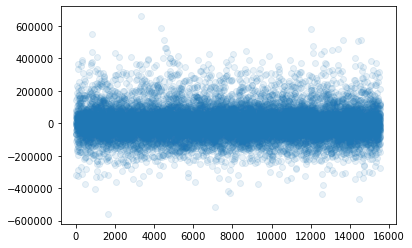

In [98]:
#Observe Residuals

y_hat = lr.predict(X_train_scaled)
resid = (y_train - y_hat)

plt.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1)

In [99]:

import sklearn.metrics as metrics
metrics.r2_score(y_train, lr.predict(X_train_scaled))

0.8338617877426238

In [100]:
metrics.mean_absolute_error(y_train, lr.predict(X_train_scaled))

65274.39441486046

In [101]:
metrics.mean_squared_error(y_train, lr.predict(X_train_scaled), squared = False)

91008.54761068278

In [102]:
y_train.median()

440000.0

In [140]:
y_train.mean()

485821.4763923685

### Summary evaluation of predictive model 2

The predictive model improved quite dramatically over model 1 by almost 12%, primarily as a result of one hot encoding the zipcode. There are 13 zipcodes where the p_value was above .05. These predictors were rejected. Our predictive model_2 now has a train score of  0.842 and a validation score of 0.835, this suggests our model is slightly overfitted. Our residuals look good suggesting we have a random distribution.  Our mean absolute error squared is 72,542 meaning our model can still be off by a fair amount in price.  If our median home value is $445,000 then ARCH will have to be careful in how prices are negotiated with sellers, but ARCH should also look to other factors beyond this model in pricing such as market pressures, mortgage lending rates, etc.

#### Apply predictive Model_2 to Test Data

In [103]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5189 entries, 10693 to 2574
Columns: 140 entries, sqft_living to 12
dtypes: float64(137), int64(3)
memory usage: 5.6 MB


In [104]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15567 entries, 13029 to 16406
Columns: 140 entries, sqft_living to 12
dtypes: float64(137), int64(3)
memory usage: 16.7 MB


#### Apply model to test data

In [105]:
# Validate model_2 against the test data
model_2.fit(X_train, y_train)
model_2.score(X_test, y_test)

0.8313230634851568

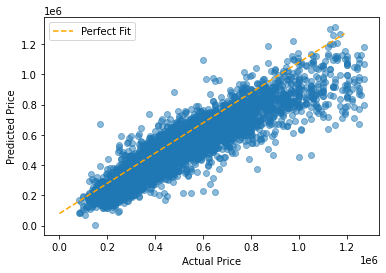

In [106]:
#Check for linearity

preds = model_2.predict(X_test)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

<AxesSubplot:>

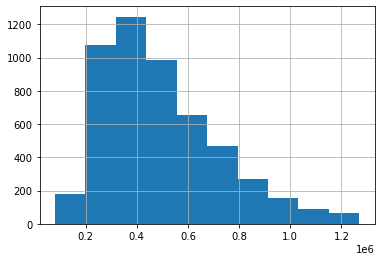

In [107]:
y_test.hist()

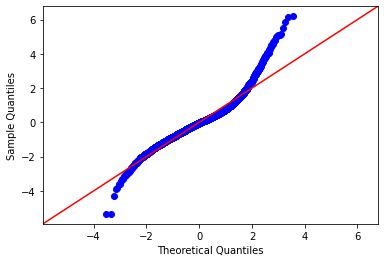

In [108]:
#Investigate normality
import scipy.stats as stats

residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

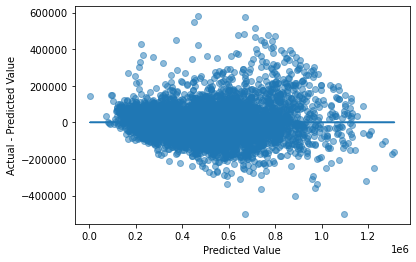

In [109]:
# Run this cell without changes
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

## 2. Inferential modeling using Statsmodel

Create an inferential model with the most salient data features. Show the interaction between the features to better help the client understand how features affect and influence one another. 

1. Identify most salient features - one hot encode categories to numeric beforehand. Use exploratory data visualization. 
2. Use three or four features to build a baseline model.
3. Add in more features for a second model
4. Scale the data and use feature selection tools for a final model
5. Compare all the inferential models for final model

In [110]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [111]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [112]:
# Load first round of most salient features. 

infer_house = house[['price', 
                    'bedrooms', 
                    'bathrooms', 
                    'sqft_living',
                    'sqft_lot',
                    'floors',
                    'condition',
                    'grade',
                    'yr_built',
                    'yr_renovated']]

infer_house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1955,0.0
1,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,1951,1991.0
2,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,1933,NaN
3,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1965,0.0
4,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1987,0.0


In [113]:
# Separate out target and predictors

y_infer = infer_house["price"]
X_infer = infer_house.drop('price', axis = 1)

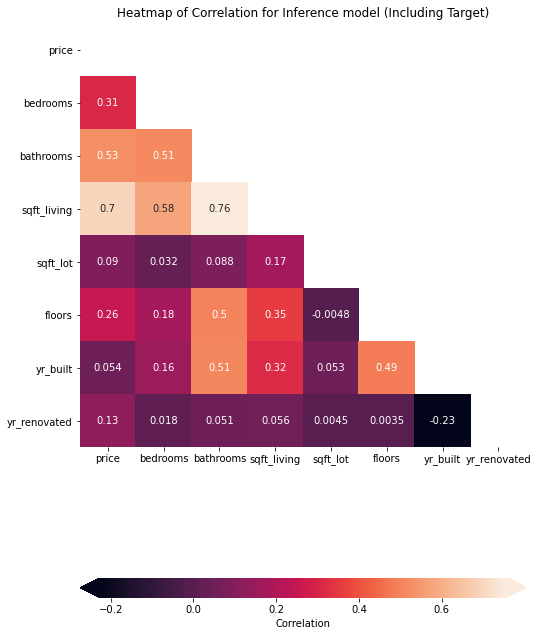

In [114]:
# Build a heatmap using existing numeric features

heatmap_data = pd.concat([y_infer, X_infer], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(8, 12))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation for Inference model (Including Target)");

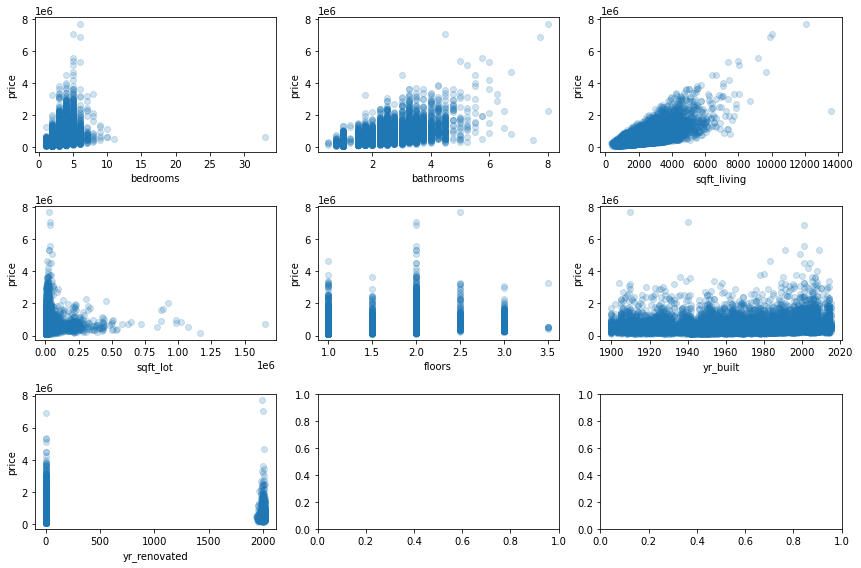

In [115]:
X_infer_numeric = X_infer[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built', 'yr_renovated']]
#scatterplot_data = X_infer_numeric.drop("price", axis=1)

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(X_infer_numeric.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_infer_numeric[col], y_infer, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

In [116]:
# Preprocess missing data and object data types.

# Handle missing data

print(infer_house.isna().sum())

print(infer_house.shape)

price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
condition          0
grade              0
yr_built           0
yr_renovated    3842
dtype: int64
(21597, 10)


In [117]:
infer_house['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

#### Year renovated
It appears that the majority of the houses have not been renovated, indicated by a 0 value. There are 3842 homes where we don't know if the home was renovated or not. We shouldn't assume these missing values imply a home was not renovated, although it is likely that many of them have not been renovated, it should become it's own column as a missing value.

In [118]:
# Convert yr_renovated in X_infer to binary, if there is a value == 1
#Create a new column name 'renovated' that captures whether the house was renovated or not

X_infer['renovated'] = X_infer['yr_renovated'].where(X_infer['yr_renovated'] == 0)
X_infer['renovated'].fillna('1', inplace = True)
X_infer['renovated']= X_infer['renovated'].astype(int)

#Drop yr_renovated column
X_infer.drop(['yr_renovated'], axis = 1, inplace = True)

#Inspect yr_renovated column is dropped and for new column renovated
X_infer.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,renovated
0,3,1.00,1180,5650,1.0,Average,7 Average,1955,0
1,3,2.25,2570,7242,2.0,Average,7 Average,1951,1
2,2,1.00,770,10000,1.0,Average,6 Low Average,1933,1
3,4,3.00,1960,5000,1.0,Very Good,7 Average,1965,0
4,3,2.00,1680,8080,1.0,Average,8 Good,1987,0


In [119]:
# Check for missing values

print(X_infer.isna().sum())
print()
print(X_infer.info())

bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
condition      0
grade          0
yr_built       0
renovated      0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     21597 non-null  int64  
 1   bathrooms    21597 non-null  float64
 2   sqft_living  21597 non-null  int64  
 3   sqft_lot     21597 non-null  int64  
 4   floors       21597 non-null  float64
 5   condition    21597 non-null  object 
 6   grade        21597 non-null  object 
 7   yr_built     21597 non-null  int64  
 8   renovated    21597 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 1.5+ MB
None


### One Hot Encode categorical features grade and condition

These features are currently in object datatype and need to be converted to numeric features while also accounting for multicollinearity. 

In [120]:
# (1) Create a variable condition_infer extracted from X_infer
# (double brackets due to shape expected by OHE)
condition_infer = X_infer[["condition"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories = "auto", sparse = False, handle_unknown = "ignore")

# (3) Fit the encoder on condition_infer
ohe.fit(condition_infer)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['Average', 'Fair', 'Good', 'Poor', 'Very Good'], dtype=object)]

In [121]:
# (4) Transform condition_train using the encoder and
# assign the result to condition_encoded_train
condition_encoded_infer = ohe.transform(condition_infer)


In [122]:
# (5a) Make the transformed data into a dataframe
condition_encoded_infer = pd.DataFrame(
    # Pass in NumPy array
    condition_encoded_infer,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_infer.index
)

# Visually inspect new dataframe
condition_encoded_infer.head()

,Average,Fair,Good,Poor,Very Good
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0


In [123]:
# (5b) Drop original condition column
X_infer.drop("condition", axis=1, inplace=True)

# (5c) Concatenate the new dataframe with current X_train
X_infer = pd.concat([X_infer, condition_encoded_infer], axis=1)

# Visually inspect X_train
X_infer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     21597 non-null  int64  
 1   bathrooms    21597 non-null  float64
 2   sqft_living  21597 non-null  int64  
 3   sqft_lot     21597 non-null  int64  
 4   floors       21597 non-null  float64
 5   grade        21597 non-null  object 
 6   yr_built     21597 non-null  int64  
 7   renovated    21597 non-null  int64  
 8   Average      21597 non-null  float64
 9   Fair         21597 non-null  float64
 10  Good         21597 non-null  float64
 11  Poor         21597 non-null  float64
 12  Very Good    21597 non-null  float64
dtypes: float64(7), int64(5), object(1)
memory usage: 2.1+ MB


In [124]:
# One hot encode grade

grade_infer = X_infer[["grade"]]

ohe.fit(grade_infer)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion',
        '3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average',
        '8 Good', '9 Better'], dtype=object)]

In [125]:
# (4) Transform condition_train using the encoder and
# assign the result to condition_encoded_train
grade_encoded_infer = ohe.transform(grade_infer)


In [126]:
# (5a) Make the transformed data into a dataframe
grade_encoded_infer = pd.DataFrame(
    # Pass in NumPy array
    grade_encoded_infer,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_infer.index
)

# Visually inspect new dataframe
grade_encoded_infer.head()

,10 Very Good,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [127]:
# (5b) Drop original grade column
X_infer.drop("grade", axis=1, inplace=True)

# (5c) Concatenate the new dataframe with current X_train
X_infer = pd.concat([X_infer, grade_encoded_infer], axis=1)

# Visually inspect X_train
X_infer.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,renovated,Average,Fair,Good,...,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
0,3,1.00,1180,5650,1.0,1955,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,2.25,2570,7242,2.0,1951,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1.00,770,10000,1.0,1933,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,3.00,1960,5000,1.0,1965,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3,2.00,1680,8080,1.0,1987,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [128]:
# Check all datatype is now numeric and no data is missing

X_infer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   sqft_lot       21597 non-null  int64  
 4   floors         21597 non-null  float64
 5   yr_built       21597 non-null  int64  
 6   renovated      21597 non-null  int64  
 7   Average        21597 non-null  float64
 8   Fair           21597 non-null  float64
 9   Good           21597 non-null  float64
 10  Poor           21597 non-null  float64
 11  Very Good      21597 non-null  float64
 12  10 Very Good   21597 non-null  float64
 13  11 Excellent   21597 non-null  float64
 14  12 Luxury      21597 non-null  float64
 15  13 Mansion     21597 non-null  float64
 16  3 Poor         21597 non-null  float64
 17  4 Low          21597 non-null  float64
 18  5 Fair

#### Identify the most highly positive and negatively correlated features



In [129]:
correlation_data = pd.concat([y_infer, X_infer], axis=1)
correlations = correlation_data.corr()
print(correlations['price'])



price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
yr_built         0.053953
renovated        0.050430
Average          0.006948
Fair            -0.051432
Good            -0.030759
Poor            -0.019886
Very Good        0.057531
10 Very Good     0.340944
11 Excellent     0.357589
12 Luxury        0.291068
13 Mansion       0.211806
3 Poor          -0.005155
4 Low           -0.031618
5 Fair          -0.084549
6 Low Average   -0.209463
7 Average       -0.316053
8 Good           0.004576
9 Better         0.235859
Name: price, dtype: float64


In [130]:
# Examine model for all features in statsmodel

infer_model_1 = sm.OLS(y_infer, X_infer).fit()
infer_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     1883.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:02:48   Log-Likelihood:            -2.9615e+05
No. Observations:               21597   AIC:                         5.923e+05
Df Residuals:                   21575   BIC:                         5.925e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.391e+04   2086.801    -16.248      0.000    -3.8e+04   -2.98e+04
bathrooms      5.725e+04   3490.366     16.402      0.000    5.04e+04    6.41e+04
sqft_living     152.1514      3.425     44.418      0.000     145.437     158.866
sqft_lot         -0.2687      0.037     -7.296      0.000      -0.341      -0.196
floors         2.901e+04   3506.291      8.274      0.000    2.21e+04    3.59e+04
yr_built      -3611.4049     68.450    -52.760      0.000   -3745.571   -3477.239
renovated      1.373e+04   3674.214      3.736      0.000    6525.004    2.09e+04
Average        5.228e+06   9.32e+04     56.100      0.000    5.05e+06    5.41e+06
Fair           5.198e+06   9.37e+04     55.482      0.000    5.01e+06    5.38e+06
Good           5.248e+06   9.24e+04     56.785      0.000    5.07e+06    5.43e+06
Poor           5.212e+06   9.93e+04     52.513      0.000    5.02e+06    5.41e+06
Very Good      5.288e+06   9.17e+04     57.692      0.000    5.11e+06    5.47e+06
10 Very Good   2.399e+06   4.54e+04     52.804      0.000    2.31e+06    2.49e+06
11 Excellent   2.682e+06   4.64e+04     57.826      0.000    2.59e+06    2.77e+06
12 Luxury      3.201e+06   5.05e+04     63.322      0.000     3.1e+06     3.3e+06
13 Mansion     4.299e+06    7.3e+04     58.905      0.000    4.16e+06    4.44e+06
3 Poor         1.795e+06   2.09e+05      8.594      0.000    1.39e+06     2.2e+06
4 Low          1.842e+06   5.82e+04     31.633      0.000    1.73e+06    1.96e+06
5 Fair         1.837e+06   4.49e+04     40.943      0.000    1.75e+06    1.92e+06
6 Low Average  1.883e+06   4.35e+04     43.279      0.000     1.8e+06    1.97e+06
7 Average      1.966e+06   4.42e+04     44.496      0.000    1.88e+06    2.05e+06
8 Good         2.062e+06   4.47e+04     46.163      0.000    1.97e+06    2.15e+06
9 Better       2.209e+06   4.51e+04     48.927      0.000    2.12e+06     2.3e+06
==============================================================================
Omnibus:                    14442.677   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           645416.960
Skew:                           2.647   Prob(JB):                         0.00
Kurtosis:                      29.253   Cond. No.                     1.19e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.94e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Inference Model 2

Create a new model that standard scales the data and accounts for most positively and most negatively correlated features. 

1. Standard scale the data to account for large values in sqft_living compared to other features.

2. Select positively correlated features with correlation value > 0.05

3. Select negatively correlated features with correlation value < -0.05


In [131]:
# Standard scale X_infer

X_infer_scaled = (X_infer - np.mean(X_infer)) / np.std(X_infer)

np.std(X_infer)

bedrooms             0.926277
bathrooms            0.768966
sqft_living        918.084869
sqft_lot         41411.678105
floors               0.539670
yr_built            29.374554
renovated            0.408967
Average              0.477232
Fair                 0.088371
Good                 0.440187
Poor                 0.036619
Very Good            0.269365
10 Very Good         0.223048
11 Excellent         0.134661
12 Luxury            0.064062
13 Mansion           0.024527
3 Poor               0.006804
4 Low                0.035336
5 Fair               0.105260
6 Low Average        0.292336
7 Average            0.492812
8 Good               0.449403
9 Better             0.326222
dtype: float64

In [132]:
X_infer_scaled.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,renovated,Average,Fair,Good,...,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
count,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,21597.000000,2.159700e+04,2.159700e+04,...,21597.000000,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04
mean,-1.750284e-16,1.368643e-16,-1.394963e-16,1.842404e-17,-5.264011e-17,2.653061e-15,-7.896016e-18,0.000000,-4.079608e-17,5.790412e-17,...,0.000000,2.533305e-17,-7.896016e-18,-7.567015e-18,-1.019902e-17,-5.264011e-18,2.105604e-17,8.422417e-17,-4.211209e-17,1.052802e-17
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023,1.000023e+00,1.000023e+00,...,1.000023,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-2.562083e+00,-2.101296e+00,-1.862923e+00,-3.520603e-01,-9.155523e-01,-2.417047e+00,-5.192208e-01,-1.360271,-8.907253e-02,-5.971562e-01,...,-0.137195,-6.432725e-02,-2.454176e-02,-6.804768e-03,-3.537992e-02,-1.064530e-01,-3.227965e-01,-8.431634e-01,-6.248873e-01,-3.711632e-01
25%,-4.029030e-01,-4.757376e-01,-7.083461e-01,-2.429124e-01,-9.155523e-01,-6.808504e-01,-5.192208e-01,-1.360271,-8.907253e-02,-5.971562e-01,...,-0.137195,-6.432725e-02,-2.454176e-02,-6.804768e-03,-3.537992e-02,-1.064530e-01,-3.227965e-01,-8.431634e-01,-6.248873e-01,-3.711632e-01
50%,-4.029030e-01,1.744858e-01,-1.855186e-01,-1.806594e-01,1.093927e-02,1.361833e-01,-5.192208e-01,0.735148,-8.907253e-02,-5.971562e-01,...,-0.137195,-6.432725e-02,-2.454176e-02,-6.804768e-03,-3.537992e-02,-1.064530e-01,-3.227965e-01,-8.431634e-01,-6.248873e-01,-3.711632e-01
75%,6.766871e-01,4.995975e-01,5.115847e-01,-1.065982e-01,9.374309e-01,8.851309e-01,-5.192208e-01,0.735148,-8.907253e-02,1.674604e+00,...,-0.137195,-6.432725e-02,-2.454176e-02,-6.804768e-03,-3.537992e-02,-1.064530e-01,-3.227965e-01,1.186010e+00,1.600289e+00,-3.711632e-01
max,3.198480e+01,7.652055e+00,1.248216e+01,3.951203e+01,3.716906e+00,1.497906e+00,1.925963e+00,0.735148,1.122681e+01,1.674604e+00,...,7.288883,1.554551e+01,4.074687e+01,1.469558e+02,2.826462e+01,9.393817e+00,3.097927e+00,1.186010e+00,1.600289e+00,2.694233e+00


In [133]:
# Get OLS results with scaled data
predictors = sm.add_constant(X_infer_scaled)
infer_model_scaled = sm.OLS(y_infer, predictors).fit()
infer_model_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     1883.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:02:48   Log-Likelihood:            -2.9615e+05
No. Observations:               21597   AIC:                         5.923e+05
Df Residuals:                   21575   BIC:                         5.925e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.403e+05   1485.975    363.597      0.000    5.37e+05    5.43e+05
bedrooms      -3.141e+04   1932.957    -16.248      0.000   -3.52e+04   -2.76e+04
bathrooms      4.402e+04   2683.975     16.402      0.000    3.88e+04    4.93e+04
sqft_living    1.397e+05   3144.856     44.418      0.000    1.34e+05    1.46e+05
sqft_lot      -1.113e+04   1524.927     -7.296      0.000   -1.41e+04   -8137.251
floors         1.566e+04   1892.241      8.274      0.000    1.19e+04    1.94e+04
yr_built      -1.061e+05   2010.674    -52.760      0.000    -1.1e+05   -1.02e+05
renovated      5613.7846   1502.633      3.736      0.000    2668.513    8559.056
Average       -7539.8714    908.868     -8.296      0.000   -9321.320   -5758.423
Fair          -4003.5292   1476.394     -2.712      0.007   -6897.371   -1109.687
Good           1809.4461    969.703      1.866      0.062     -91.244    3710.136
Poor          -1154.3515   1492.909     -0.773      0.439   -4080.564    1771.861
Very Good      1.187e+04   1324.104      8.966      0.000    9276.415    1.45e+04
10 Very Good   7.252e+04   1636.966     44.300      0.000    6.93e+04    7.57e+04
11 Excellent   8.198e+04   1678.576     48.839      0.000    7.87e+04    8.53e+04
12 Luxury      7.223e+04   1594.876     45.288      0.000    6.91e+04    7.54e+04
13 Mansion     5.458e+04   1529.645     35.681      0.000    5.16e+04    5.76e+04
3 Poor        -1897.8289   1486.773     -1.276      0.202   -4812.013    1016.356
4 Low         -8182.4820   1495.388     -5.472      0.000   -1.11e+04   -5251.410
5 Fair         -2.49e+04   1526.474    -16.313      0.000   -2.79e+04   -2.19e+04
6 Low Average -5.566e+04   1601.265    -34.763      0.000   -5.88e+04   -5.25e+04
7 Average       -5.3e+04   1223.759    -43.308      0.000   -5.54e+04   -5.06e+04
8 Good        -5021.7008   1123.577     -4.469      0.000   -7223.995   -2819.407
9 Better       4.411e+04   1462.684     30.160      0.000    4.12e+04     4.7e+04
==============================================================================
Omnibus:                    14442.677   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           645416.960
Skew:                           2.647   Prob(JB):                         0.00
Kurtosis:                      29.253   Cond. No.                     4.09e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.93e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [134]:
# Create new variable with most correlated features: features < -0.05 and features > 0.05

X_infer_2 = X_infer_scaled[['sqft_living', 
                     #'bathrooms', 
                     #'bedrooms', 
                     #'floors', 
                     '10 Very Good', 
                     '11 Excellent', 
                     '12 Luxury', 
                     'renovated', 
                     '13 Mansion', 
                     '9 Better', 
                     '6 Low Average', 
                     '7 Average', 
                     'sqft_lot', 
                     'yr_built', 
                     #'Very Good', 
                     '5 Fair',
                     #'Poor', #high p value
                     #'Fair',
                     'Good', #p-value just above .05
                     'Average'
                     ]]

#Turn off features that are captured by other categories. 
# sqft_living captures data in bathrooms, bedrooms, and floors
# A condition of Good and Average capture more variance


In [135]:
# Examine model for correlated features in statsmodel

predictors_2 = sm.add_constant(X_infer_2)
infer_model_2 = sm.OLS(y_infer, predictors_2).fit()
infer_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     2694.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:02:48   Log-Likelihood:            -2.9648e+05
No. Observations:               21597   AIC:                         5.930e+05
Df Residuals:                   21582   BIC:                         5.931e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.403e+05   1508.597    358.145      0.000    5.37e+05    5.43e+05
sqft_living    1.454e+05   2398.984     60.617      0.000    1.41e+05     1.5e+05
10 Very Good   7.871e+04   1783.728     44.128      0.000    7.52e+04    8.22e+04
11 Excellent   8.775e+04   1730.094     50.718      0.000    8.44e+04    9.11e+04
12 Luxury      7.622e+04   1613.791     47.230      0.000    7.31e+04    7.94e+04
renovated      7362.9541   1523.316      4.834      0.000    4377.141    1.03e+04
13 Mansion     5.702e+04   1547.590     36.847      0.000     5.4e+04    6.01e+04
9 Better       4.948e+04   1796.604     27.540      0.000     4.6e+04     5.3e+04
6 Low Average -5.958e+04   1933.402    -30.817      0.000   -6.34e+04   -5.58e+04
7 Average     -5.666e+04   1978.769    -28.634      0.000   -6.05e+04   -5.28e+04
sqft_lot      -1.208e+04   1537.081     -7.859      0.000   -1.51e+04   -9067.452
yr_built      -8.933e+04   1865.795    -47.879      0.000    -9.3e+04   -8.57e+04
5 Fair          -2.6e+04   1591.265    -16.338      0.000   -2.91e+04   -2.29e+04
Good            -1.8e+04   2608.344     -6.903      0.000   -2.31e+04   -1.29e+04
Average       -2.435e+04   2748.248     -8.860      0.000   -2.97e+04    -1.9e+04
==============================================================================
Omnibus:                    14374.841   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           628451.437
Skew:                           2.635   Prob(JB):                         0.00
Kurtosis:                      28.896   Cond. No.                         3.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
# Check for multicollinearity, examine features for multicollinearity 

# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [137]:
#VIF starts at 1 and has no upper limit

#VIF = 1, no correlation between the independent variable and the other variables

#VIF exceeding 5 indicates high multicollinearity between this independent variable and the others

calc_vif(X_infer_2)

,variables,VIF
0,sqft_living,2.528765
1,10 Very Good,1.398013
2,11 Excellent,1.315203
3,12 Luxury,1.144322
4,renovated,1.019610
5,13 Mansion,1.052363
6,9 Better,1.418269
7,6 Low Average,1.642472
8,7 Average,1.720458
9,sqft_lot,1.038120


In [138]:
# Use a selector to find best features

from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_infer_for_RFECV = StandardScaler().fit_transform(X_infer_2)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_infer_for_RFECV, y_infer)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_infer_2.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
sqft_living: True
10 Very Good: True
11 Excellent: True
12 Luxury: True
renovated: True
13 Mansion: True
9 Better: True
6 Low Average: True
7 Average: True
sqft_lot: True
yr_built: True
5 Fair: True
Good: True
Average: True


### Results for Final Predictive Model

In [160]:
print("Baseline Model uses Square Foot Living Space as the most correlated feature")
print()
print("Baseline Train score:     ", baseline_scores["train_score"].mean())
print("Baselin Validation score:", baseline_scores["test_score"].mean())
print()
print("Model_1 converts categorical data to numeric and one hot encodes grade, condition, view and renovated.")
print()
print("Model_1 Train score:     ", model_1_scores["train_score"].mean())
print("Model_1 Validation score:", model_1_scores["test_score"].mean())
print()
print("Model_2 further one hot encodes for bedrooms, bathrooms, floors, zipcode, and sale_month.\n"
      "Model_2 also standardizes the data and eliminates variables with p-value > 0.05. \n"
      "By one hot encoding zipcode the score increased by 10%.")
print()
print("Model_2 Train score:     ", model_2_scores["train_score"].mean())
print("Model_2 Validation score:", model_2_scores["test_score"].mean())

Baseline Model uses Square Foot Living Space as the most correlated feature

Baseline Train score:      0.40324782709139456
Baselin Validation score: 0.409301098969402

Model_1 converts categorical data to numeric and one hot encodes grade, condition, view and renovated.

Model_1 Train score:      0.7028422850446635
Model_1 Validation score: 0.7035709013153183

Model_2 further one hot encodes for bedrooms, bathrooms, floors, zipcode, and sale_month.
Model_2 also standardizes the data and eliminates variables with p-value > 0.05. 
By one hot encoding zipcode the score increased by 10%.

Model_2 Train score:      0.8382318896676972
Model_2 Validation score: 0.837137229023198


#### Score Final Model

In [151]:
metrics.r2_score(y_train, lr.predict(X_train_scaled))

0.8338617877426238

#### Cross validate the model

In [162]:
cross_val_score(model_2, X_train, y_train, cv=3)

array([0.8218404 , 0.83271487, 0.83073384])

#### Mean Error Squared

In [153]:
metrics.mean_squared_error(y_train, lr.predict(X_train_scaled), squared = False)

91008.54761068278

#### Mean Absolute Error Squared

In [152]:
metrics.mean_absolute_error(y_train, lr.predict(X_train_scaled))

65274.39441486046

#### Apply model to test data

In [161]:
model_2.fit(X_train, y_train)
model_2.score(X_test, y_test)

0.8313230634851568

### Final Results for Inference modeling

Final inference model applies features with a correlation < -0.05 and > 0.05.
Select features that displayed high degrees of multicollinearity were eliminated as those data trends
were captured by other features. Sqft_living proved to be a good proxy for number of bedrooms, bathrooms, 
and floors. 

In [139]:
infer_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     2694.
Date:                Fri, 16 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:07:22   Log-Likelihood:            -2.9648e+05
No. Observations:               21597   AIC:                         5.930e+05
Df Residuals:                   21582   BIC:                         5.931e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.403e+05   1508.597    358.145      0.000    5.37e+05    5.43e+05
sqft_living    1.454e+05   2398.984     60.617      0.000    1.41e+05     1.5e+05
10 Very Good   7.871e+04   1783.728     44.128      0.000    7.52e+04    8.22e+04
11 Excellent   8.775e+04   1730.094     50.718      0.000    8.44e+04    9.11e+04
12 Luxury      7.622e+04   1613.791     47.230      0.000    7.31e+04    7.94e+04
renovated      7362.9541   1523.316      4.834      0.000    4377.141    1.03e+04
13 Mansion     5.702e+04   1547.590     36.847      0.000     5.4e+04    6.01e+04
9 Better       4.948e+04   1796.604     27.540      0.000     4.6e+04     5.3e+04
6 Low Average -5.958e+04   1933.402    -30.817      0.000   -6.34e+04   -5.58e+04
7 Average     -5.666e+04   1978.769    -28.634      0.000   -6.05e+04   -5.28e+04
sqft_lot      -1.208e+04   1537.081     -7.859      0.000   -1.51e+04   -9067.452
yr_built      -8.933e+04   1865.795    -47.879      0.000    -9.3e+04   -8.57e+04
5 Fair          -2.6e+04   1591.265    -16.338      0.000   -2.91e+04   -2.29e+04
Good            -1.8e+04   2608.344     -6.903      0.000   -2.31e+04   -1.29e+04
Average       -2.435e+04   2748.248     -8.860      0.000   -2.97e+04    -1.9e+04
==============================================================================
Omnibus:                    14374.841   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           628451.437
Skew:                           2.635   Prob(JB):                         0.00
Kurtosis:                      28.896   Cond. No.                         3.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Analysis

### Conclusions

### Recommendations